In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/salader/dogs-vs-cats')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sanskar184
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:07<00:00, 147MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,labels):
  image = tf.cast(image/255.0,tf.float32)
  return image, labels


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32,(3,3),padding='same', activation='relu',input_shape=(256,256,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.4))


model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,667,205 (48.32 MB)

 Trainable params: 4,222,337 (16.11 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 8,444,676 (32.21 MB)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
               loss='binary_crossentropy',
               metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_history = model.fit(train_ds,
                          epochs = 30,
                          batch_size=64,
                          validation_data=validation_ds,
                          verbose=1,
                          callbacks=[early_stopping])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 65ms/step - accuracy: 0.5505 - loss: 1.4448 - val_accuracy: 0.5780 - val_loss: 0.7956
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6065 - loss: 0.6524 - val_accuracy: 0.5548 - val_loss: 0.6825
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6427 - loss: 0.6313 - val_accuracy: 0.5262 - val_loss: 0.6940
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6733 - loss: 0.6000 - val_accuracy: 0.6794 - val_loss: 0.5877
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.6985 - loss: 0.5694 - val_accuracy: 0.7032 - val_loss: 0.5982
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7283 - loss: 0.5281 - val_accuracy: 0.7376 - val_loss: 0.5244
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7513 - loss: 0.4923 - val_accuracy: 0.7420 - val_loss: 0.5354
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7773 - loss: 0.4580 - 

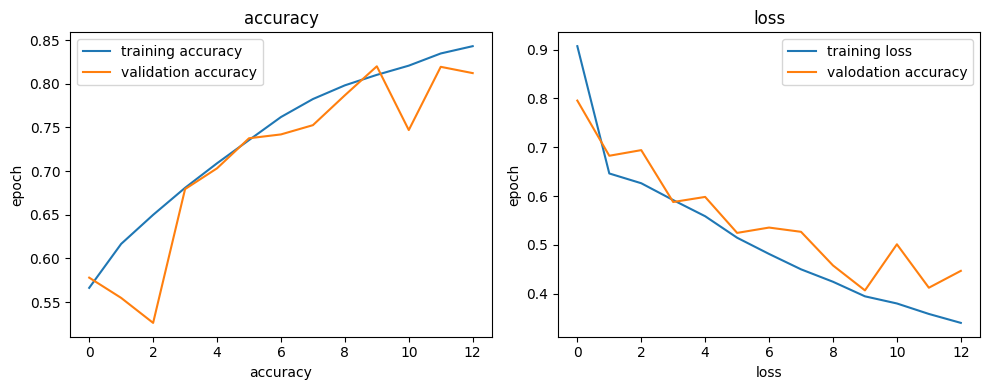

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(model_history.history['accuracy'],label=['training accuracy'])
plt.plot(model_history.history['val_accuracy'],label=['validation accuracy'])
plt.title('accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(model_history.history['loss'],label=['training loss'])
plt.plot(model_history.history['val_loss'],label=['valodation accuracy'])
plt.title('loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


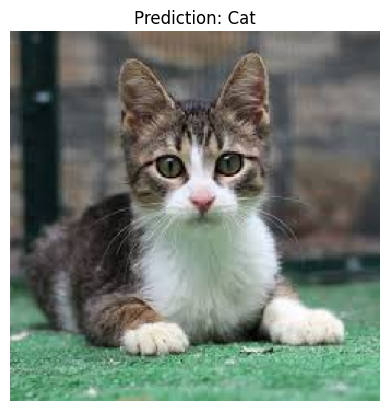

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = '/content/cat2.jpeg' # Replace with the path to your image
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_array)

# Interpret the prediction and display the image
plt.imshow(img)
plt.axis('off') # Hide axes
if prediction[0] > 0.5:
    plt.title("Prediction: Dog")
else:
    plt.title("Prediction: Cat")
plt.show()